### QKN1 — QKN1 Task 3: Presentation
### Analytics Programming — D598
### Abiy Mekuria
### Western Governors University
### Analytics Programming — D598
### Keiona Middleton
### August 27, 2025


In [ ]:
 #!/usr/bin/env python
# coding: utf-8

In [5]:
import pandas as pd
import pandas as pd          # for data handling
import matplotlib.pyplot as plt   # for plotting (bar, histogram, scatter, pie)
import seaborn as sns        # for prettier charts 

 ### A:CODE

In [38]:
# Loading and Displaying Data
df = pd.read_excel("/Users/behailu/Desktop/WGU-Workspace/Task2/D598 Data Set.xlsx")

df2 = df.groupby("Business State").mean(numeric_only=True)
df2.head()

,Business ID,Total Long-term Debt,Total Equity,Debt to Equity,Total Liabilities,Total Revenue,Profit Margin
Business State,,,,,,,
Alabama,1.599117e+09,6.743890e+08,1.441039e+09,0.345473,1.893946e+09,6.968309e+08,0.403732
Arizona,9.445082e+09,6.508800e+07,5.915300e+07,1.100333,1.109380e+08,2.155800e+08,0.206902
Arkansas,8.411162e+09,8.960450e+07,1.082420e+08,0.844746,2.138820e+08,4.789090e+08,0.098319
California,1.063053e+10,3.273964e+07,4.535982e+07,0.169920,8.018100e+07,8.869559e+07,0.287947
Colorado,9.966963e+09,8.470025e+07,2.007589e+08,0.619971,1.454528e+08,2.486542e+08,0.346033


In [40]:
df["Debt_to_Equity_Calc"] = df["Total Long-term Debt"]/df["Total Equity"]
df["Debt_to_Equity_Calc"].head()

0    0.935886
1    0.341758
2    0.107951
3    0.421820
4    0.084665
Name: Debt_to_Equity_Calc, dtype: float64

In [42]:
#Summary of Analyzed dataset
summary_table = df[["Business ID", "Business State", "Debt_to_Equity_Calc", "Profit Margin"]].copy()
summary_table["Debt_to_Equity_Calc"] = summary_table["Debt_to_Equity_Calc"].round(2)
summary_table["Profitability"] = summary_table["Profit Margin"].apply(
    lambda x: "Profitable" if x > 0 else "Not Profitable"
)
summary_table.head()

,Business ID,Business State,Debt_to_Equity_Calc,Profit Margin,Profitability
0,41872013,Kentucky,0.94,0.023663,Profitable
1,76232013,Iowa,0.34,0.265015,Profitable
2,160992013,Texas,0.11,0.130413,Profitable
3,197452013,Delaware,0.42,0.196768,Profitable
4,241042013,Illinois,0.08,0.168305,Profitable


### B:VISUALIZATIONS
> 4 customazed chart

<AxesSubplot:xlabel='Business State'>

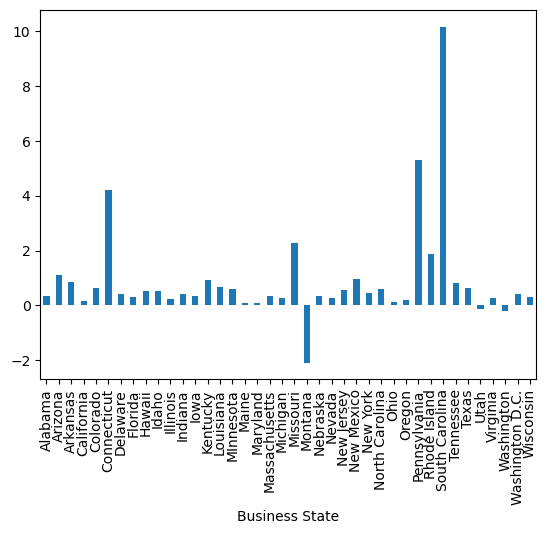

In [45]:
# 1.Bar Chart – Average Debt-to-Equity by State
df.groupby("Business State")["Debt_to_Equity_Calc"].mean().plot(kind="bar")

In [47]:
state_profit = df.groupby(["Business State", "Profitability"])["Business ID"].count().unstack(fill_value=0)
state_profit.plot(kind="bar", stacked= True, figsize=(10,6), title="Business Profitability by State")

KeyError: 'Profitability'

(array([ 1.,  0.,  1.,  1.,  2., 91., 42.,  7.,  2.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.]),
 array([-4.28355193, -3.48476323, -2.68597453, -1.88718583, -1.08839712,
        -0.28960842,  0.50918028,  1.30796898,  2.10675768,  2.90554638,
         3.70433509,  4.50312379,  5.30191249,  6.10070119,  6.89948989,
         7.6982786 ,  8.4970673 ,  9.295856  , 10.0946447 , 10.8934334 ,
        11.6922221 , 12.49101081, 13.28979951, 14.08858821, 14.88737691,
        15.68616561, 16.48495431, 17.28374302, 18.08253172, 18.88132042,
        19.68010912]),
 <BarContainer object of 30 artists>)

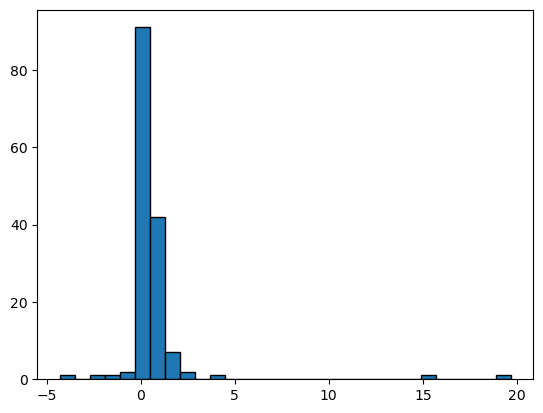

In [49]:
# 2.Histogram – Distribution of Debt-to-Equity
plt.hist(df["Debt_to_Equity_Calc"], bins=30, edgecolor="black")

In [ ]:
# 3. Pie Chart – Profitability
# Create a new column for Profitability
df["Profitability"] = df["Profit Margin"].apply(lambda x: "Profitable" if x > 0 else "Not Profitable")